#  <center> <font style="color:rgb(100,109,254)">Hough Lines and Hough Circles</font> </center>


## <font style="color:rgb(134,19,348)"> Probabilistic Hough Line Transform  </font>

In OpenCV all the above can be done by using the built in OpenCV function called `cv2.HoughLines()`, but we will first try another another optimized implementation of Hough lines in OpenCV called Probabilistic Hough Line Transform which is more efficient. You can use this with `cv2.HoughLinesP()`, it returns x1,y1 and x2,y2 for each detected line.

[```lines	=	cv2.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]])```](https://docs.opencv.org/4.2.0/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb)

**Parameters:**

- `image`	8-bit, single-channel binary source image. This image is the output of the edge detection.
- `lines`	Output vector of lines. Each line is represented by a 4-element vector (x1,y1,x2,y2) , where (x1,y1) and (x2,y2) are the ending points of each detected line segment.
- `rho`	Distance resolution of the accumulator in pixels.
- `theta`	Angle resolution of the accumulator in radians.
- `threshold`	Accumulator threshold parameter. Only those lines are returned that get enough votes ( >threshold ).
- `minLineLength`	Minimum line length. Line segments shorter than that are rejected.
- `maxLineGap`	Maximum allowed gap between points on the same line to link them.

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

lines detected 241


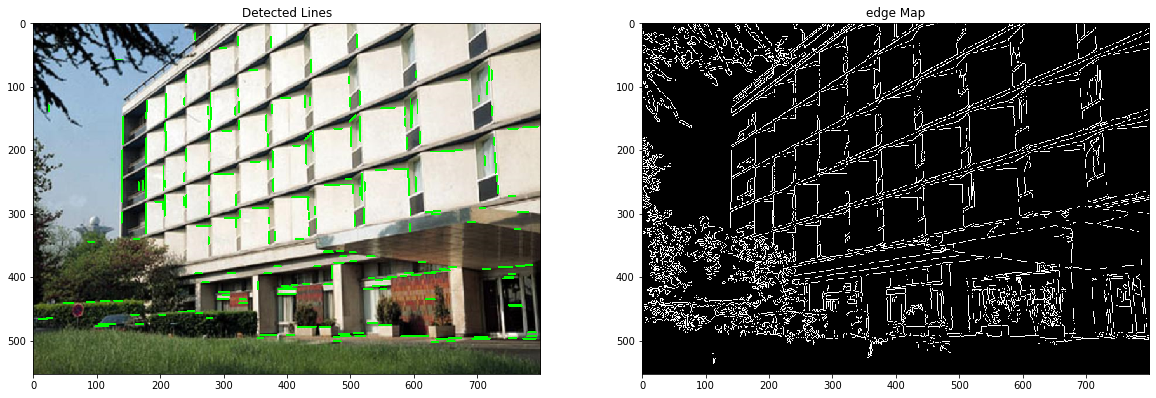

In [5]:
img = cv2.imread('media/M4/houghsample.jpg')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray,50,250)

# All lines must have atleast this length
minLineLength = 30 

# If a gap between lines is greater than this than treat it as seperate lines
maxLineGap = 10

# Setting distance resolution to 1 pixel, (Highest possible resolution)
rho_resolution = 1

# Setting theta resolution to 1 degree, (very High, 180 bins)
theta_resolution = np.pi/180

# Consider it line if it gets atlest 30 votes
threshold =  34

# Perform Probabilistic Hough transform
lines = cv2.HoughLinesP(edges, theta_resolution, theta_resolution, threshold, minLineLength, maxLineGap)#third param is

# Draw the detected lines
if lines is not None:
  print('lines detected {}'.format(len(lines)))

  for line in lines:
      x1,y1,x2,y2 = line[0]
      cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
     
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[:,:,::-1]);plt.title("Detected Lines");
plt.subplot(122);plt.imshow(edges, cmap='gray');plt.title("edge Map");   

**Note:** The results of hough transforms are directly dependent upon how good the edge map of that image is. So make sure your edge detector is registering the lines you want to detect.

**Lets take a look at the normal Hough transform**

## <font style="color:rgb(134,19,348)"> Hough Line Transform  </font>
The theory explained above is encapsulated in the OpenCV function, `cv2.HoughLines()`. It simply returns an array of (rho, theta) values. ρ is measured in pixels and θ is measured in radians.

[```lines	=	cv2.HoughLines(	image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]])```](https://docs.opencv.org/4.2.0/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a)

- `image`	8-bit, single-channel binary source image. The image may be modified by the function.
- `lines`	Output vector of lines. Each line is represented by a 2 or 3 element vector (ρ,θ) or (ρ,θ,votes) . ρ is the -distance from the coordinate origin (0,0) (top-left corner of the image). θ is the line rotation angle in radians ( 0∼vertical line,π/2∼horizontal line ). votes is the value of accumulator.
- `rho`	Distance resolution of the accumulator in pixels.
- `theta`	Angle resolution of the accumulator in radians.
- `threshold`	Accumulator threshold parameter. Only those lines are returned that get enough votes ( >threshold ).
- `srn`	For the multi-scale Hough transform, it is a divisor for the distance resolution rho . The coarse accumulator distance resolution is rho and the accurate accumulator resolution is rho/srn . If both srn=0 and stn=0 , the classical Hough transform is used. Otherwise, both these parameters should be positive.
- `stn`	For the multi-scale Hough transform, it is a divisor for the distance resolution theta.
- `min_theta`	For standard and multi-scale Hough transform, minimum angle to check for lines. Must fall between 0 and max_theta.
- `max_theta`	For standard and multi-scale Hough transform, maximum angle to check for lines. Must fall between min_theta and CV_P

lines detected 4


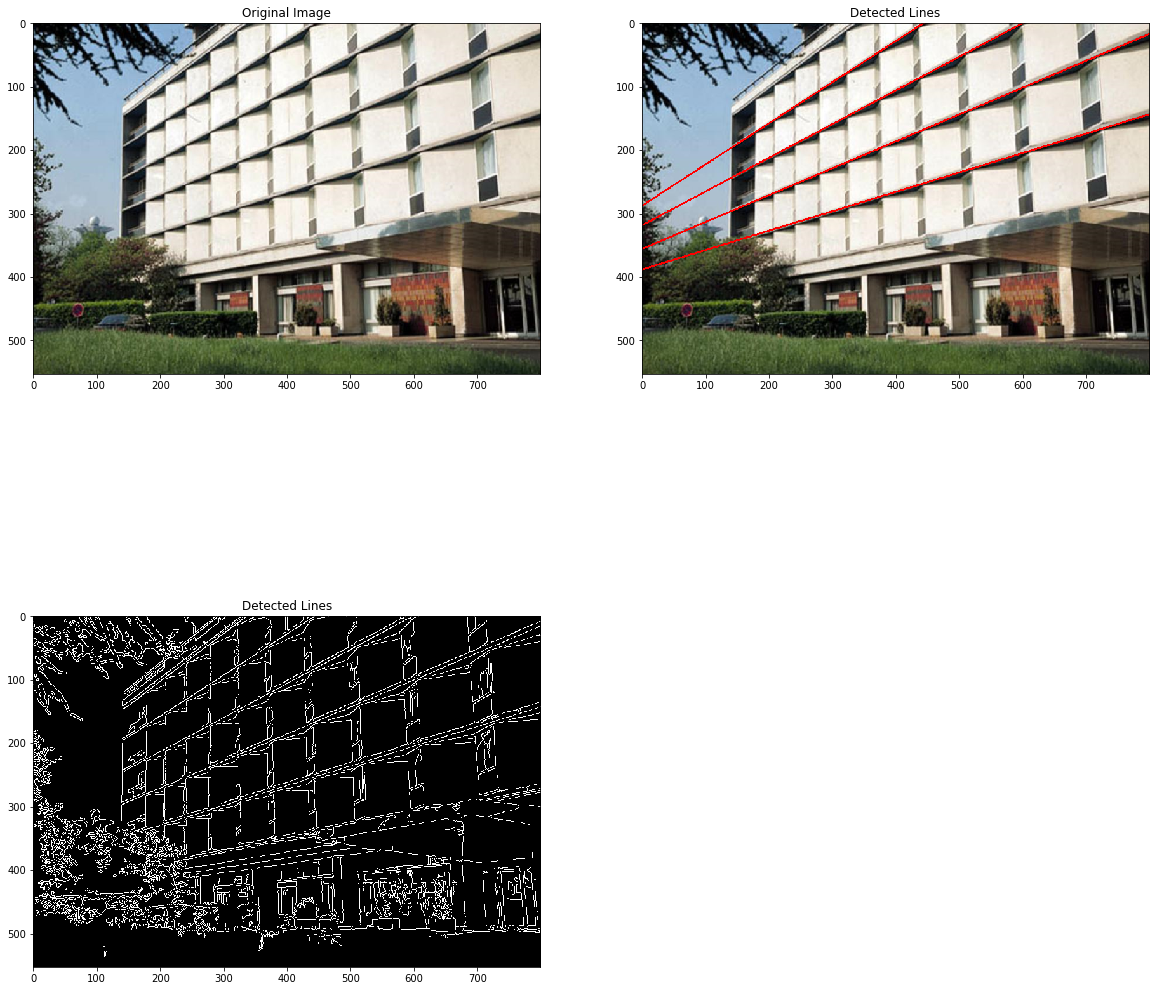

In [6]:
img = cv2.imread('media/M4/houghsample.jpg')
original = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,250)

threshold = 240
lines = cv2.HoughLines(edges,1, np.pi/180, threshold)


for line in lines:
    # Grab the rho & theta
    rho,theta = line[0]
    
    # Using rho, and theta draw get x1,y1 and x2,y2 in cartesian. For adjusting these change 1000 to some other value.
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

print('lines detected {}'.format(len(lines)))

plt.figure(figsize=[20,20])
plt.subplot(221);plt.imshow(original[:,:,::-1]);plt.title("Original Image");
plt.subplot(222);plt.imshow(img[:,:,::-1]);plt.title("Detected Lines");   
plt.subplot(223);plt.imshow(edges,cmap='gray');plt.title("Detected Lines"); 

**With Normal Hough transform you don't get starting and ending points of lines but it seems to perform better than the former method with minimal tuning, (This is an observation of limited tests)**

## <font style="color:rgb(134,19,348)"> HOUGH CIRCLE  </font>

In terms of theory detecting circles with hough transforms is pretty similar, the difference here is that the circle consists of 3 parameters i.e. center (x,y) and radius so instead of a 2D accumulator you'll need a 3D accumulator for a circle, and similarly this way any simple shape which is can be defined by a few parameters can be detected using Generalized hough transforms.

OpenCV implements a detection method slightly different than the standard Hough Transform: **The Hough gradient method**, which is made up of two main stages. The first stage involves edge detection and finding the possible circle centers and the second stage finds the best radius for each candidate center. This function can be accessed using  `cv2.HoughCircles`.

[``` circles	= cv2.HoughCircles(	image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]	)```](https://docs.opencv.org/4.2.0/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d)

**Parameters**
- `image`	8-bit, single-channel, gray scale input image.
- `circles`	Output vector of found circles. Each vector is encoded as 3 or 4 element floating-point vector (x,y,radius) or (x,y,radius,votes) .
- `method`	Detection method. Currently, the only implemented method is HOUGH_GRADIENT
- `dp` This parameter is the inverse ratio of the accumulator resolution to the image resolution. Essentially, the larger the dp gets, the smaller the accumulator array gets. For example, if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height.
- `minDist` Minimum distance between the center (x, y) coordinates of detected circles. If the minDist is too small, multiple circles in the same neighborhood as the original may be (falsely) detected. If the minDist is too large, then some circles may not be detected at all.
- `param1`	First method-specific parameter. In case of HOUGH_GRADIENT , it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller).
- `param2`	Second method-specific parameter. In case of HOUGH_GRADIENT , it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first.
- `minRadius`	Minimum circle radius.
- `maxRadius`	Maximum circle radius. If <= 0, uses the maximum image dimension. If < 0, returns centers without finding the radius.

*Note: The `minDist` parameter is really important to get right. Without an optimal `minDist` value, you may  miss some circles, or you may start detecting lots of false circles.*

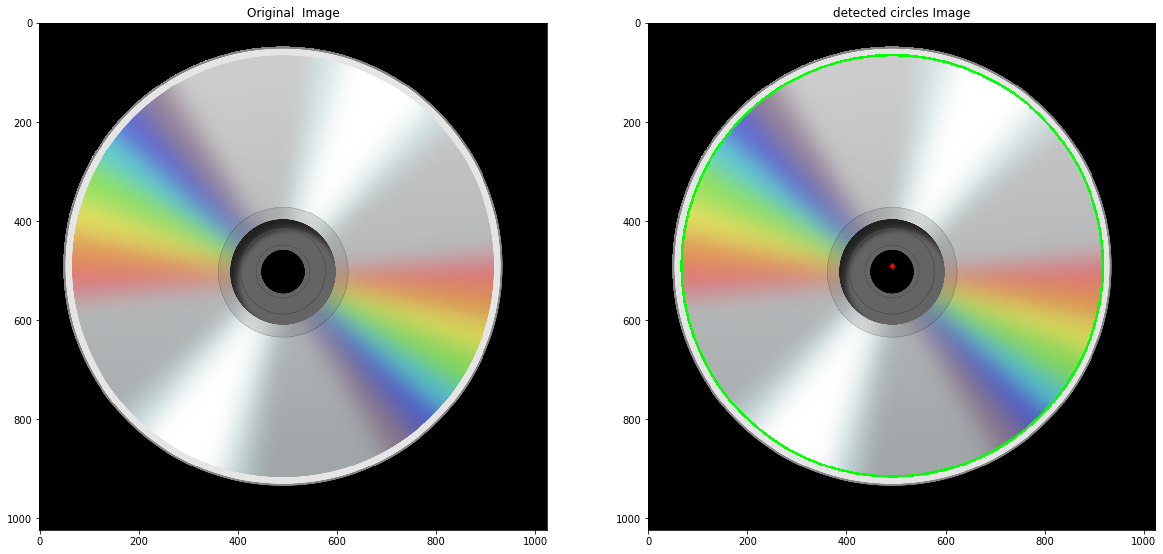

In [11]:
img = cv2.imread('media/M4/cd.png')
original= img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT, dp=1.01, minDist=40,maxRadius=430)

# Circles is a tuple array with radius , x and y co-ordinates
if circles is not None:
    for i in circles[0,:]:
        # Draw the outer circle  
        cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),4)
        # Draw the center of the circle
        cv2.circle(img,(i[0],i[1]),2,(0,0,255),5)

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(original[:,:,::-1]);plt.title("Original  Image");
plt.subplot(122);plt.imshow(img[:,:,::-1]);plt.title("detected circles Image");

**By controlling the max radius param you can control if you want to detect inner circles or outer circles**

**Note:** Currently I couldn't find a python implementation for generalized hough transform in opencv but it possibly exists in some other image processing package scikit-image, Although In opencv there is a C++ implementation of it.